# **Encoding**

El siguiente paso es hacer el encoding a las variables categóricas.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import pickle


import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../../../')
from src import funciones_encoding as fe

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [2]:
df = pd.read_pickle("../../../datos/cluster_2/df_nonulls.pkl")
df.head(2)

,Ship Mode,Segment,Country,Market,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority
19,Second Class,Consumer,Tanzania,Africa,Appliances,6,0.0,818.28,763.38,High
86,Same Day,Home Office,Morocco,Africa,Appliances,4,0.0,113.28,556.45,Medium


Primero comprobamos visualmente si las variables tienen orden:

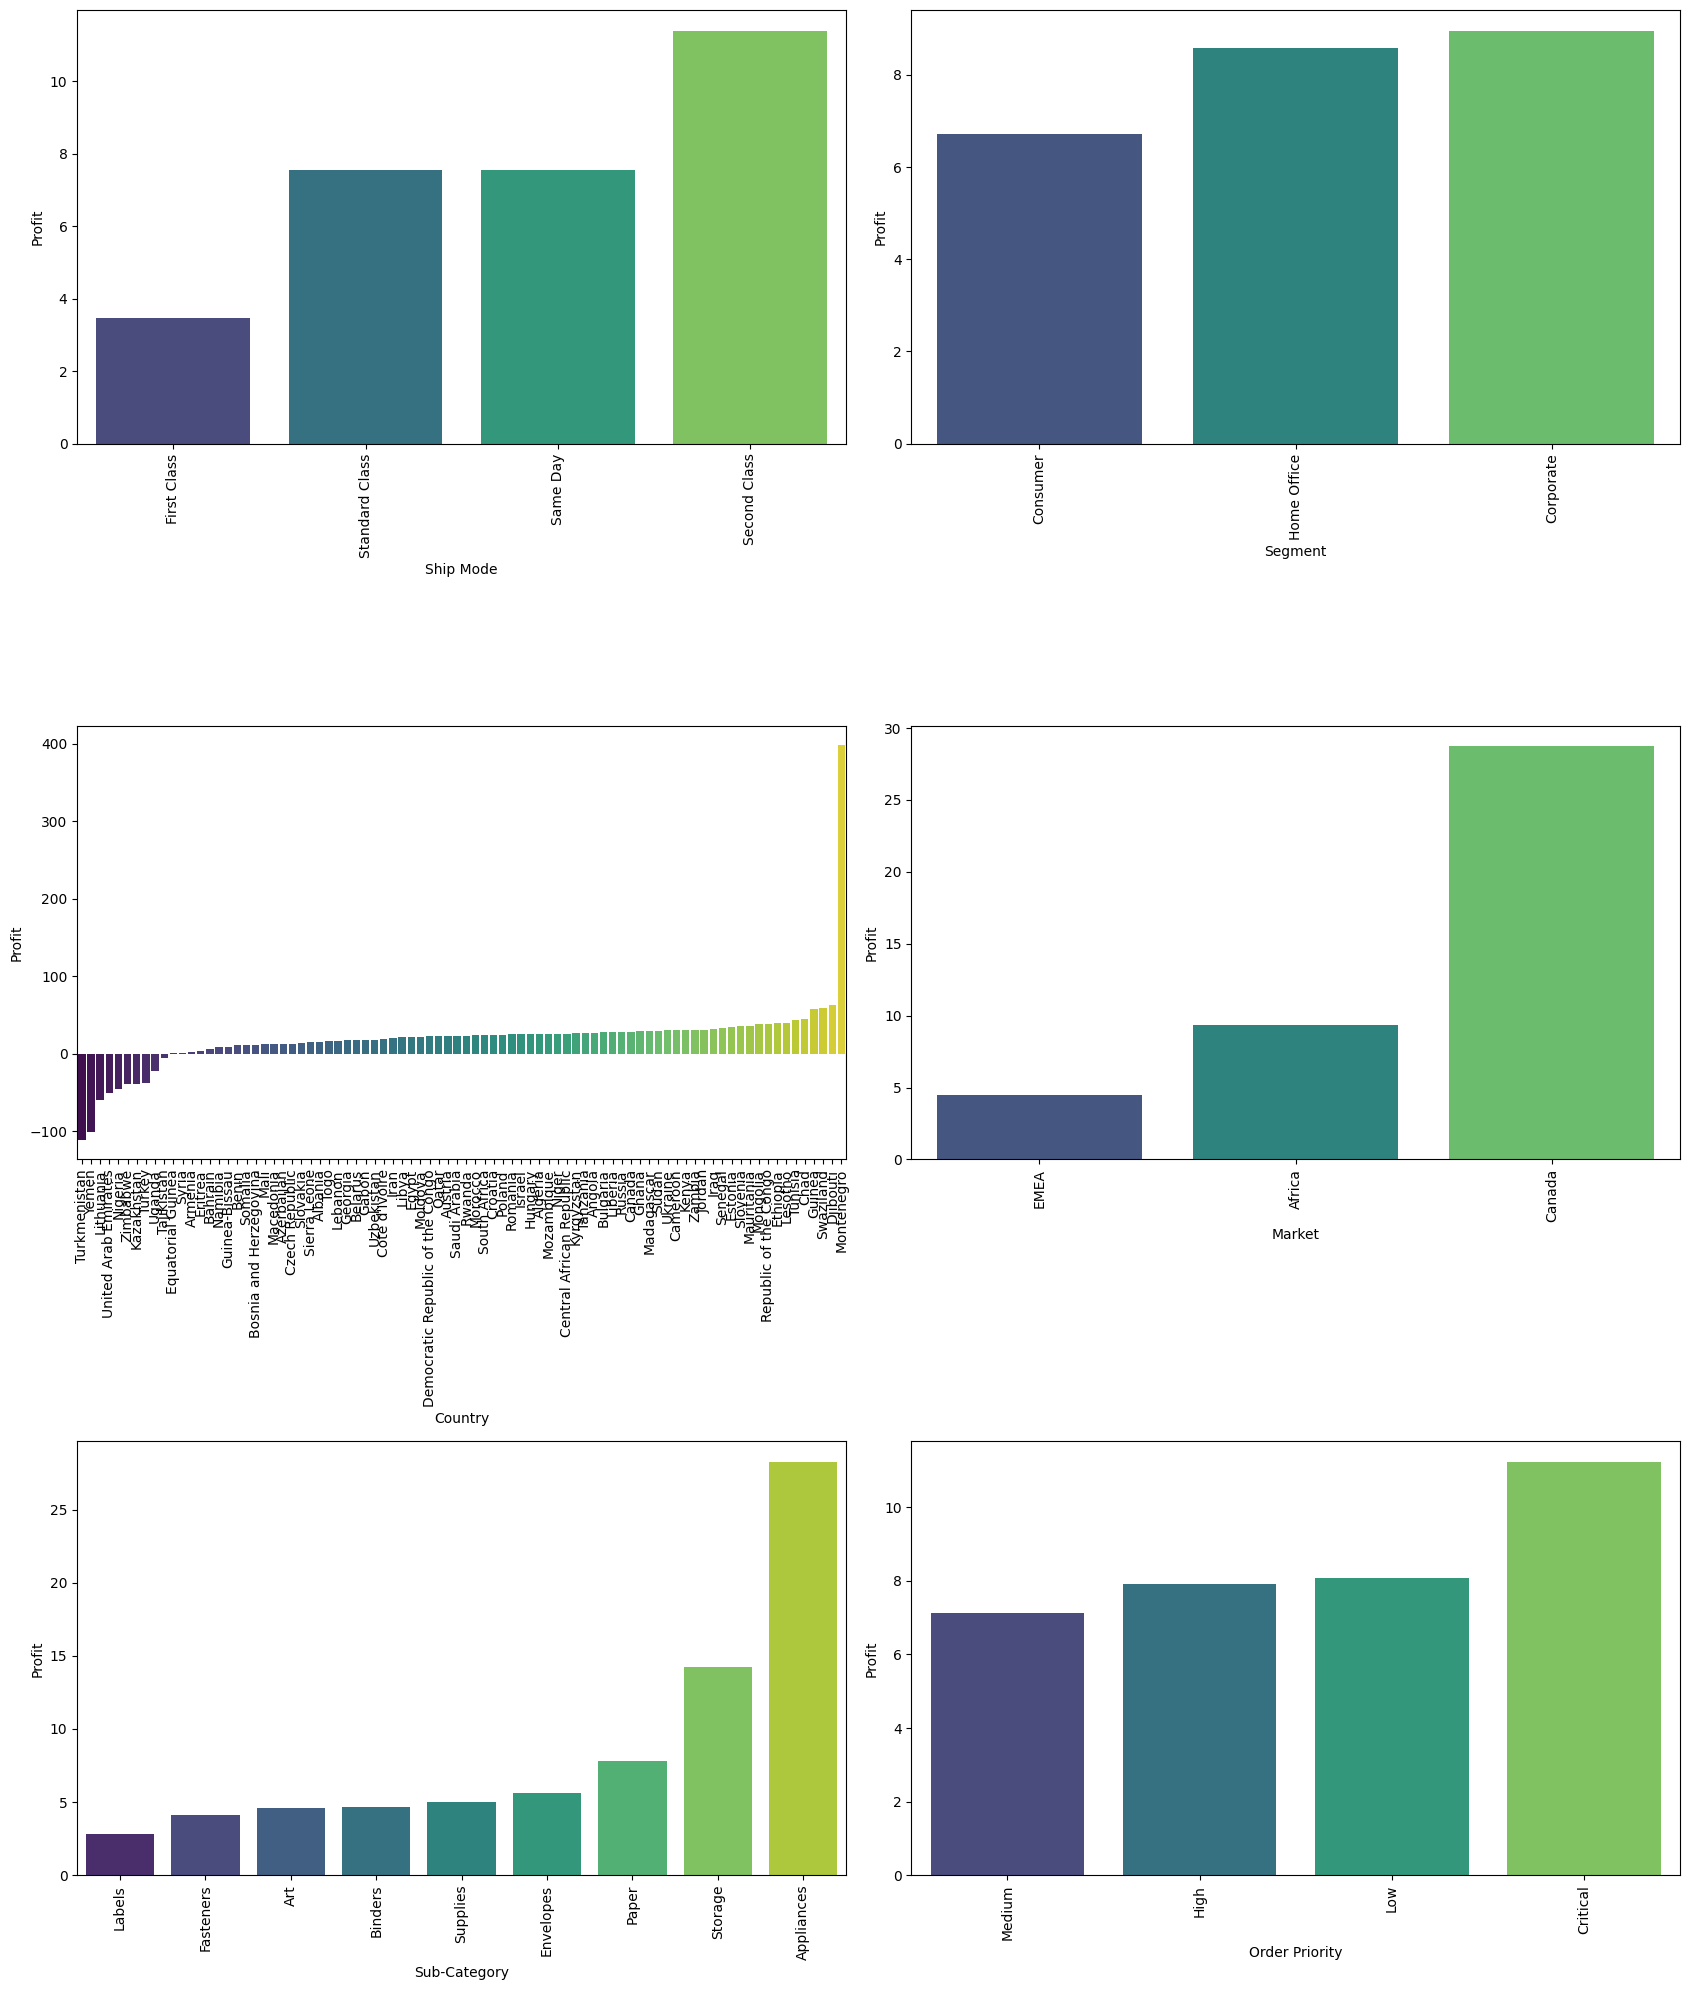

In [3]:
lista_col_categoricas = df.select_dtypes(exclude=np.number).columns
var_respuesta = "Profit"

analisis = fe.Analisis_Visual_Encoding(df, lista_col_categoricas, var_respuesta)
analisis.crear_barplot(tamano_grafica=(17, 20))

A primera vista parece que todas tienen orden, comprobémoslo:

In [4]:
var_respuesta = "Profit"
asuncion = fe.Asunciones(df, var_respuesta)

for col in lista_col_categoricas:
    print(f"Estamos analizando la variable {col.upper()}")
    asuncion.identificar_normalidad(metodo = "kolmogorov") 
    asuncion.identificar_homogeneidad(columna_categorica = col)
    test = fe.TestEstadisticos(df, var_respuesta, col)
    test.run_all_tests()
    print("\n###########################\n")

Estamos analizando la variable SHIP MODE
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Ship Mode las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Second Class', 'Same Day', 'First Class', 'Standard Class']

Realizando test de Kruskal...
Estadístico de prueba: 6.284849506713623
Valor p: 0.09854482728309145
>>>>>>>>> NO hay evidencia suficiente para concluir que hay una diferencia significativa.

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable SEGMENT
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Segment las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Consumer', 'Home Office', 'Corporate']

Realizando test de Kruskal...
Estadístico de prueba: 0.08842034071198432
Valor p: 0.9567528552527393
>>>>>>>>> NO hay evidencia suficiente para concluir que hay una diferencia significativa.

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable COUNTRY
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Country las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Tanzania', 'Morocco', 'Ukraine', 'South Africa', 'Cameroon', 'Hungary', 'Ghana', 'Iran', 'Mozambique', 'Iraq', 'Chad', 'Montenegro', 'Canada', 'Egypt', 'Russia', 'Poland', 'Kenya', 'Nigeria', 'Algeria', 'Senegal', 'Israel', 'Zambia', 'Democratic Republic of the Congo', 'Togo', 'Estonia', 'Guinea', 'Central African Republic', 'Turkey', 'Mongolia', "Cote d'Ivoire", 'Madagascar', 'Sudan', 'Romania', 'Mauritania', 'Benin', 'Angola', 'Liberia', 'Djibouti', 'Saudi Arabia', 'Rwanda', 'Tunisia', 'Croatia', 'Moldova', 'Bulgaria', 'Libya', 'Jordan', 'Czech Republic', 'Niger', 'Swaziland', 'Azerbaijan', 'Kyrgyzstan', 'Yemen', 'Austria', 'Republic of the Congo', 'Turkmenistan', 'Qatar', 'Kazakhstan', 'Uzbekistan', 'Bela

,meandiff,p-adj,lower,upper,group_diff
48,382.0800,0.0000,168.5757,595.5843,Albania-Montenegro
116,-63.7891,0.0000,-111.1239,-16.4543,Algeria-Kazakhstan
123,-84.4774,0.0001,-149.0758,-19.8790,Algeria-Lithuania
130,372.2843,0.0000,185.3559,559.2126,Algeria-Montenegro
135,-71.3096,0.0000,-101.7677,-40.8516,Algeria-Nigeria
...,...,...,...,...,...
3473,-131.1276,0.0000,-207.3510,-54.9041,Ukraine-Yemen
3475,-68.7221,0.0000,-113.6049,-23.8392,Ukraine-Zimbabwe
3480,-119.3844,0.0003,-213.2829,-25.4860,Uzbekistan-Yemen
3483,131.6376,0.0000,47.6592,215.6161,Yemen-Zambia



###########################

Estamos analizando la variable MARKET
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Market las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Africa', 'EMEA', 'Canada']

Realizando test de Kruskal...
Estadístico de prueba: 110.34749797177541
Valor p: 1.0923083900999712e-24
>>>>>>>>> HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LOS DATOS

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,19.3745,0.0004,7.4020,31.3469,Africa-Canada
1,-4.8431,0.0471,-9.6380,-0.0482,Africa-EMEA
2,-24.2176,0.0000,-36.1518,-12.2833,Canada-EMEA



###########################

Estamos analizando la variable SUB-CATEGORY
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Sub-Category las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Appliances', 'Storage', 'Art', 'Paper', 'Envelopes', 'Fasteners', 'Supplies', 'Binders', 'Labels']

Realizando test de Kruskal...
Estadístico de prueba: 180.63665219284357
Valor p: 7.567096783757373e-35
>>>>>>>>> HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LOS DATOS

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-23.6477,0.0001,-39.3919,-7.9035,Appliances-Art
1,-23.6122,0.0001,-39.3650,-7.8595,Appliances-Binders
2,-22.6495,0.0049,-41.2091,-4.0899,Appliances-Envelopes
3,-24.1627,0.0014,-42.4936,-5.8319,Appliances-Fasteners
4,-25.4207,0.0006,-43.8546,-6.9868,Appliances-Labels
5,-20.4508,0.0204,-39.1902,-1.7114,Appliances-Paper
7,-23.2720,0.0028,-41.6498,-4.8943,Appliances-Supplies



###########################

Estamos analizando la variable ORDER PRIORITY
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Order Priority las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['High', 'Medium', 'Critical', 'Low']

Realizando test de Kruskal...
Estadístico de prueba: 0.5056746097661898
Valor p: 0.9176429676483543
>>>>>>>>> NO hay evidencia suficiente para concluir que hay una diferencia significativa.

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################



Al contrario que nuestras sopechas hemos descubierto que ship mode, segment y order priority si que tienen orden, por lo que a las variables que no tienen orden les haremos un one-hot y al resto un target.

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'Market', 'Sub-Category', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
diccionario_encoding={"onehot":['Ship Mode', 'Segment', 'Order Priority'], "target":['Country', 'Market', 'Sub-Category']}
var_respuesta = "Profit"
encoding = fe.Encoding(df, diccionario_encoding, var_respuesta)

In [7]:
df_ohe, one_hot_encoder = encoding.one_hot_encoding()
df_ohe.drop(columns=diccionario_encoding["onehot"], inplace=True)
df_ohe.head()

,Country,Market,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,Tanzania,Africa,Appliances,6,0.0,818.28,763.38,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Morocco,Africa,Appliances,4,0.0,113.28,556.45,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Ukraine,EMEA,Appliances,6,0.0,629.28,443.55,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,South Africa,Africa,Storage,14,0.0,779.52,422.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,South Africa,Africa,Appliances,4,0.0,606.36,400.03,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [8]:
df_ohe_target, target_encoder = encoding.target_encoding()
df_ohe_target.head(3)

,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,818.28,26.585094,9.353055,28.254095,6,0.0,763.38,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,113.28,23.711383,9.353055,28.254095,4,0.0,556.45,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,629.28,30.233133,4.509976,28.254095,6,0.0,443.55,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Guardamos los encoders para las futuras predicciones:

In [10]:
with open('../../../datos/cluster_2/preprocesamiento/target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

with open('../../../datos/cluster_2/preprocesamiento/one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_encoder, f)


Guardamos el df la con el encoding hecho:

In [11]:
df_ohe_target.to_pickle("../../../datos/cluster_2/df_nonulls_encoded.pkl")